<a href="https://colab.research.google.com/github/jpernja1/Business-Intelligence-and-Analytics/blob/master/assignment_Jelica_Pernjakovic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/Assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import statistics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

warnings.filterwarnings('ignore')
%matplotlib inline

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left"/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics Personal Assignment</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

# IMPORTANT

Question 1: Before starting this assignment, please indicate whether this course is worth 4.5 or 6 credits to you. Please answer truthfully, as checks will be made afterwards. This question is only intended to facilitate the calculation of final points.

> TODO: 6

# Part 1: Climate Analytics - Rice vs Wheat in a Changing World

## Context

You work as a junior data analyst at SerriFleur, an international NGO focused on sustainable agriculture in the face of climate change. Your team is investigating how climate conditions and farming practices affect the yields of rice and wheat — two of the most critical staple crops globally.

You’ve just received a massive dataset from the research division: "Hydroponix.csv". Your task is to extract insights, build models, and tell a compelling story from the data. You can find the dataset here: https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/Hydroponix.csv

Columns Overview:

* `Year` : Year of the observation.

* `Country` : Country where the data was collected.

* `Region` : Specific region within the country.

* `Crop_Type` : Type of agricultural crop observed.

* `Average_Temperature` : Annual average temperature in degrees Celsius.

* `Total_Precipitation` : Total annual precipitation in millimeters.

* `CO2_Emissions` : CO₂ emissions in million tons.

* `Crop_Yield` : Agricultural yield in tons per hectare.

* `Extreme_Weather_Events` : Number of recorded extreme weather events.

* `Irrigation_Access` : Percentage of cultivated land with access to irrigation.

* `Pesticide_Use` : Pesticide use in kilograms per hectare.

* `Fertilizer_Use` : Fertilizer use in kilograms per hectare.

* `Soil_Health_Index` : Soil quality index (out of 100).

* `Economic_Impact` : Economic impact in million USD.

In [ ]:
url= "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/Hydroponix.csv"
data_climate = pd.read_csv(url)
print(data_climate)

      Year    Country              Region  Crop_Type  Average_Temperature  \
0     2001      India         West Bengal       Corn                 1.55   
1     2024      China               North       Corn                 3.23   
2     2001     France       Ile-de-France      Wheat                21.11   
3     2001     Canada            Prairies     Coffee                27.85   
4     1998      India          Tamil Nadu  Sugarcane                 2.19   
...    ...        ...                 ...        ...                  ...   
9995  2022     France  Nouvelle-Aquitaine     Cotton                30.48   
9996  1999  Australia          Queensland   Soybeans                 9.53   
9997  2000  Argentina           Patagonia     Coffee                31.92   
9998  1996     Brazil           Southeast   Soybeans                13.95   
9999  2015      China               South       Corn                11.78   

      Total_Precipitation  CO2_Emissions  Crop_Yield  Irrigation_Access  \


## Exercise 1: Data Cleaning & Preprocessing



The dataset you’ve received contains data from multiple countries, various crops, and inconsistent formatting. Your first job is to narrow the scope of your study and prepare a clean dataset that’s ready for analysis.

Your mission:

*   Filter the dataset to focus only on rice and wheat
*   Drop the regional identifiers column
*   Group the data by Country, Year and Crop_type but don't put them as index (*Hint: specific parameter of `groupby`*) and calculate the mean of each column
*   Change the type of the columns `Country` and `Crop_type`


In [ ]:
# Question 2: Find the list of crop types produced by SerriFleur

data_climate['Crop_Type'].unique()

array(['Corn', 'Wheat', 'Coffee', 'Sugarcane', 'Fruits', 'Rice', 'Barley',
       'Vegetables', 'Soybeans', 'Cotton'], dtype=object)

In [ ]:
# Data cleaning

filtered_data = data_climate[(data_climate["Crop_Type"] == "Rice") | (data_climate["Crop_Type"] == "Wheat")]

if 'Region' in filtered_data.columns:
    filtered_data = filtered_data.drop(columns = "Region")
grouped_data = filtered_data.groupby(['Country', 'Year', 'Crop_Type'],as_index=False).mean()
grouped_data['Country'] = data_climate['Country'].astype(str)
grouped_data['Crop_Type'] = data_climate['Crop_Type'].astype(str)
print(grouped_data)

       Country  Year  Crop_Type  Average_Temperature  Total_Precipitation  \
0        India  1990       Corn              25.2500          1540.486667   
1        China  1990       Corn              10.7550           867.305000   
2       France  1991      Wheat              14.3175           761.692500   
3       Canada  1992     Coffee              14.8650          1190.220000   
4        India  1992  Sugarcane              27.5200          1304.713333   
..         ...   ...        ...                  ...                  ...   
660  Argentina  2022       Corn              23.7650          1656.835000   
661    Nigeria  2023  Sugarcane              -2.1100          1730.185000   
662     France  2023     Fruits              22.2000          1058.493333   
663     Russia  2024     Barley              22.1640          1199.048000   
664        USA  2024   Soybeans              10.2050          1751.595000   

     CO2_Emissions  Crop_Yield  Irrigation_Access  Pesticide_Use  \
0      

In [ ]:
# Question 3: Find the total number of countries where Serrifleur operates in

num_countries = data_climate['Country'].nunique()
print(num_countries)

10


**Note on Climate Variables per Crop**:

> You may notice that climate-related variables such as average temperature and total precipitation vary across different crops, even for the same country and year. This is because each crop is typically grown in different regions within a country, depending on factors like soil conditions, irrigation availability, and climatic suitability. For example, wheat might be cultivated in cooler northern regions while corn is grown in warmer southern areas. Therefore, the recorded climate data reflects regional conditions specific to where each crop is grown, rather than national averages. This is an important consideration when interpreting the results of this analysis.

## Exercise 2: Exploratory Data Analysis

Before diving into modeling, your supervisor wants a clear picture of the current state of affairs in South America. You’re tasked with visualizing total precipitation level, economic impacts and soil health.

Your mission:


*   Plot total precipitation evolution over the years for each crop in Argentina
*   Create a pie chart that shows the percentage share of the total economic impact for each crop in Brazil
*   Create boxplots comparing soil health across crops and all the countries


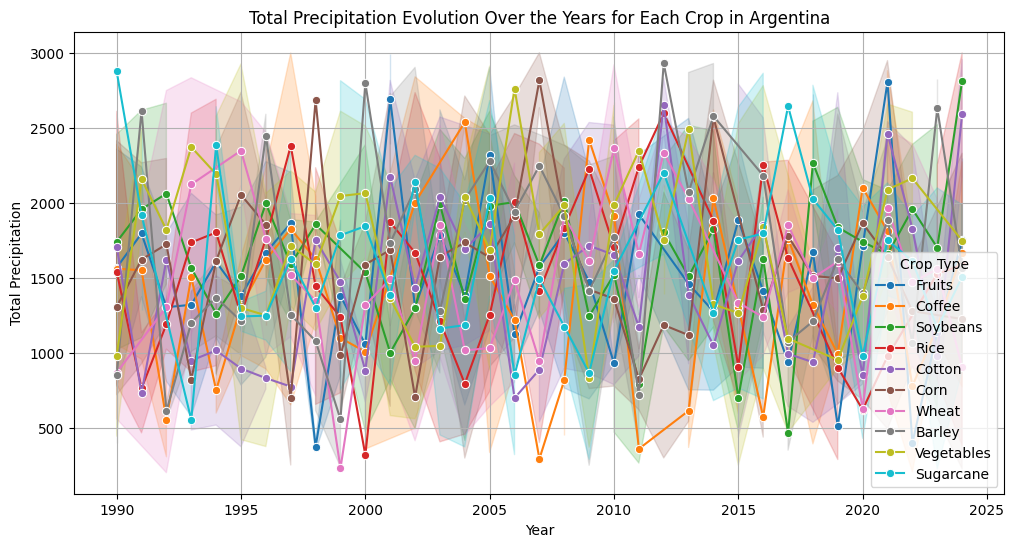

In [ ]:
# Question 4: Create the graph of the total precipitation evolution over the years for each crop in Argentina
df = pd.read_csv(url)
argentina_data = df[df['Country'] == 'Argentina']

plt.figure(figsize=(12, 6))
sns.lineplot(data=argentina_data, x='Year', y='Total_Precipitation', hue='Crop_Type', marker = 'o')
plt.title('Total Precipitation Evolution Over the Years for Each Crop in Argentina')
plt.xlabel('Year')
plt.ylabel('Total Precipitation')
plt.legend(title='Crop Type')
plt.grid(True)
plt.show()

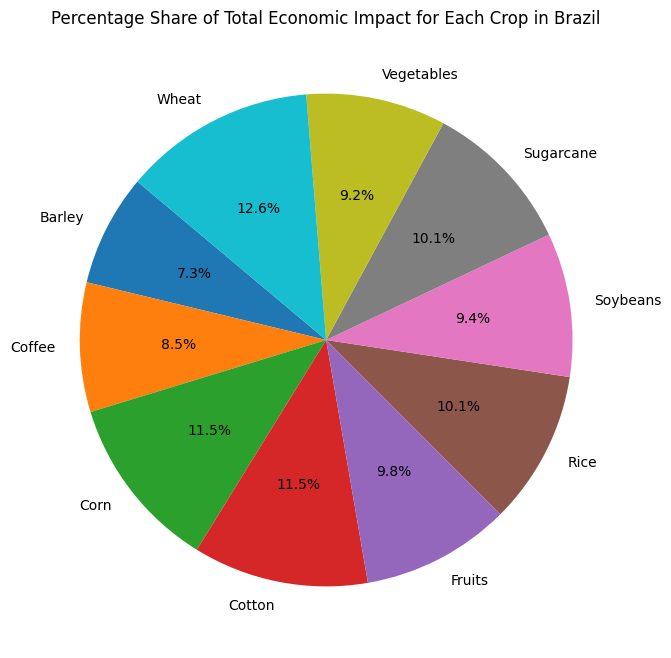

In [ ]:
# Question 5: Create the pie chart that shows the percentage share of the totale economic impact for each crop in Brazil

brazil_data = df[df['Country'] == 'Brazil']
economic_impact = brazil_data.groupby('Crop_Type')['Economic_Impact'].sum()

plt.figure(figsize=(8, 8))
plt.pie(economic_impact, labels=economic_impact.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Share of Total Economic Impact for Each Crop in Brazil')
plt.show()

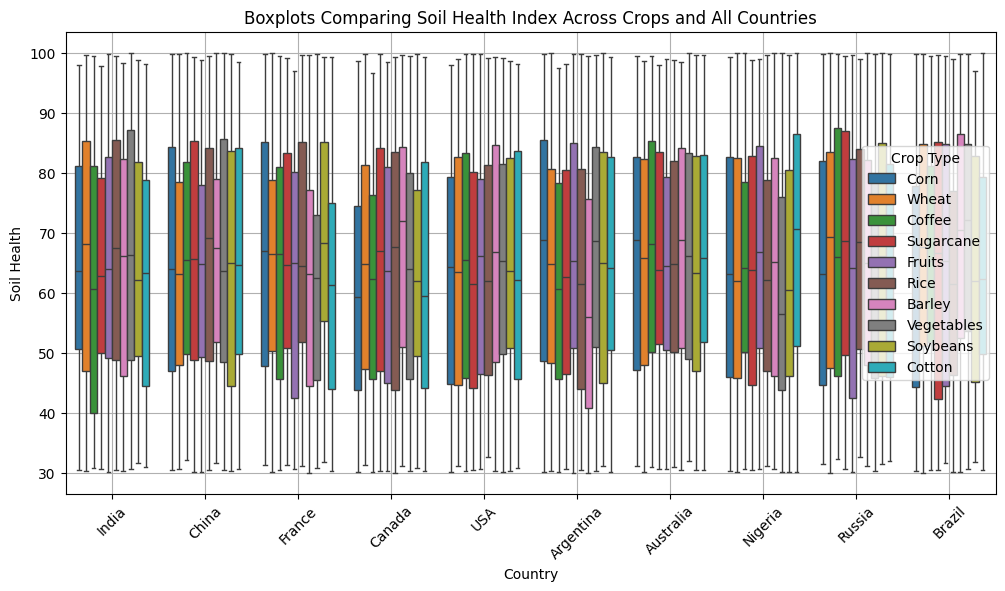

In [ ]:
# Question 6: Create the boxplots that compare the soil health index across crops and all the countries

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country', y='Soil_Health_Index', hue='Crop_Type')
plt.title('Boxplots Comparing Soil Health Index Across Crops and All Countries')
plt.xlabel('Country')
plt.ylabel('Soil Health')
plt.legend(title='Crop Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Exercise 3: Clustering

SerriFleur aims to classify countries based on their farming practices in order to provide region-specific recommendations. You propose using unsupervised learning to identify distinct fertilizer usage profiles.

Your mission:



*   For each crop type, use agglomerative clustering on fertilizer usage with 4 clusters, euclidian distance metric and ward linkage
*   Analyze whether wheat and rice follow similar cluster pattern
*   Plot the dendrogram representation of fertilizer usage, for each crop type, with euclidian distance metric and average linkage


In [ ]:
# Agglomerative Clustering for Wheat
# Question 7: Find the number of values in each clustering label

wheat_data = df[df['Crop_Type'] == 'Wheat']
scaler = StandardScaler()
wheat_data[['Pesticide_Use', 'Fertilizer_Use']] = scaler.fit_transform(wheat_data[['Pesticide_Use', 'Fertilizer_Use']])
agg_clustering_wheat = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
wheat_data['Cluster'] = agg_clustering_wheat.fit_predict(wheat_data[['Pesticide_Use', 'Fertilizer_Use']])

cluster_counts_wheat = wheat_data['Cluster'].value_counts()
print(cluster_counts_wheat)

Cluster
0    353
2    283
1    220
3    191
Name: count, dtype: int64


In [ ]:
# Agglomerative Clustering for Rice
# Question 7: Find the number of values in each clustering label

rice_data = df[df['Crop_Type'] == 'Rice']
scaler = StandardScaler()
rice_data[['Pesticide_Use', 'Fertilizer_Use']] = scaler.fit_transform(rice_data[['Pesticide_Use', 'Fertilizer_Use']])
agg_clustering_rice = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rice_data['Cluster'] = agg_clustering_rice.fit_predict(rice_data[['Pesticide_Use', 'Fertilizer_Use']])

cluster_counts_rice = rice_data['Cluster'].value_counts()
print(cluster_counts_rice)

Cluster
0    359
2    283
3    200
1    180
Name: count, dtype: int64


In [ ]:
# Question 8: Hierarchical Clustering for Wheat
# Don't forget to reshape the values with numpy


wheat_data = df[df['Crop_Type'] == 'Wheat']
scaler = StandardScaler()
wheat_data[['Pesticide_Use', 'Fertilizer_Use']] = scaler.fit_transform(wheat_data[['Pesticide_Use', 'Fertilizer_Use']])
fertilizer_use_values = wheat_data[['Pesticide_Use', 'Fertilizer_Use']].values.reshape(-1, 1)
agg_clustering_wheat = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
wheat_data['Cluster'] = agg_clustering_wheat.fit_predict(wheat_data[['Pesticide_Use', 'Fertilizer_Use']])

cluster_counts_wheat = wheat_data['Cluster'].value_counts()
print(cluster_counts_wheat)


Cluster
0    353
2    283
1    220
3    191
Name: count, dtype: int64


In [ ]:
# Question 8: Hierarchical Clustering for Rice
# Don't forget to reshape the values with numpy

rice_data = df[df['Crop_Type'] == 'Rice']
scaler = StandardScaler()
rice_data[['Pesticide_Use', 'Fertilizer_Use']] = scaler.fit_transform(rice_data[['Pesticide_Use', 'Fertilizer_Use']])
fertilizer_use_values = rice_data[['Pesticide_Use', 'Fertilizer_Use']].values.reshape(-1, 1)
agg_clustering_rice = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rice_data['Cluster'] = agg_clustering_rice.fit_predict(rice_data[['Pesticide_Use', 'Fertilizer_Use']])

cluster_counts_rice = rice_data['Cluster'].value_counts()
print(cluster_counts_rice)


Cluster
0    359
2    283
3    200
1    180
Name: count, dtype: int64


## Exercise 4: Simple Linear Regression

A policymaker asks a simple question: "Does CO₂ have a measurable impact on crop yield for wheat and rice ?"
You decide to test this using a basic regression model.

Your mission:

*   Plot the heatmap of correlations for numeric columns only.
*   Model Crop_Yield as a function of CO2_Emissions (with `test_size = 0.3`, `random_state = 123` and `shuffle=True`).
*   Use MinMaxScaler and find the $R^2$, the MSE and the MAE.






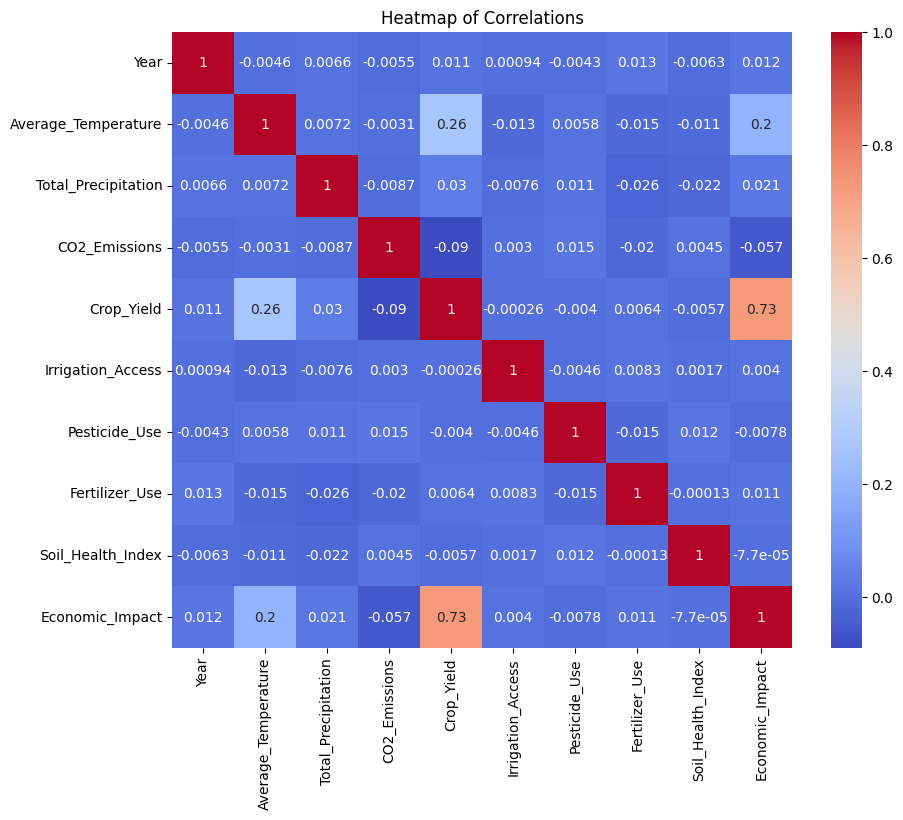

In [ ]:
# Question 9: Plot heatmap of correlations

plt.figure(figsize=(10, 8))
numeric_data = data_climate.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

In [ ]:
# Seperate features and labels

x = data_climate['CO2_Emissions'].values.reshape(-1, 1)
y = data_climate['Crop_Yield'].values.reshape(-1, 1)
print(x)
print(y)

[[15.22]
 [29.82]
 [25.75]
 ...
 [26.01]
 [17.31]
 [ 5.34]]
[[1.737]
 [1.737]
 [1.719]
 ...
 [1.161]
 [3.348]
 [3.71 ]]


In [ ]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123, shuffle=True)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[15.17]
 [15.9 ]
 [ 5.46]
 ...
 [10.69]
 [ 4.5 ]
 [ 9.21]]
[[25.76]
 [25.02]
 [ 5.69]
 ...
 [ 7.11]
 [ 3.31]
 [ 4.58]]
[[0.891]
 [2.484]
 [1.25 ]
 ...
 [1.33 ]
 [1.881]
 [1.93 ]]
[[1.26 ]
 [3.825]
 [1.54 ]
 ...
 [1.55 ]
 [2.82 ]
 [1.67 ]]


In [ ]:
# Scale the data

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)
print(x_test_scaled)

[[0.49728814]
 [0.5220339 ]
 [0.16813559]
 ...
 [0.34542373]
 [0.13559322]
 [0.29525424]]
[[0.85627119]
 [0.83118644]
 [0.1759322 ]
 ...
 [0.2240678 ]
 [0.09525424]
 [0.13830508]]


In [ ]:
# Create linear regression model and fit into the training data

model = LinearRegression()
model.fit(x_train_scaled, y_train)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [[-0.30222025]]
Model intercept: [2.38425491]


In [ ]:
# Question 10: Print out the R2, MSE and MAE score
x_test_scaled = data_climate['CO2_Emissions'].values.reshape(-1, 1)
y_test = data_climate['Crop_Yield'].values.reshape(-1, 1)
y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score:", r2)
print("MSE:", mse)
print("MAE:", mae)


R2 score: -26.285674946609735
MSE: 27.192524817872943
MAE: 4.509475660772019


## Exercise 5: Multivariate Regression with Categorical Variables

Real-life relationships are rarely one-dimensional. You now create a new model to include all the other variables of the dataset, some of which are key climate factors.

Your mission:


*   Transform the column `Crop_Type` using `LabelEncoder`function and the column `Country` using `One-Hot` encoding
*   Build a multivariate regression model using all the variables to predict crop yield  (with `test_size = 0.3`, `random_state = 123` and `shuffle=True`)
*   Compare its performance with the previous model of part 4



In [ ]:
# Seperate features and labels, and transform the columns Crop_Type and Country (don't forget to delete the old columns)

x = data_climate.drop(['Crop_Yield'], axis=1)
y = data_climate['Crop_Yield']

label_encoder = LabelEncoder()
x['Crop_Type_Encoded'] = label_encoder.fit_transform(x['Crop_Type'])
onehot_encoder = OneHotEncoder()
country_encoded = onehot_encoder.fit_transform(x[['Country']]).toarray()
country_encoded_df = pd.DataFrame(country_encoded, columns=onehot_encoder.get_feature_names_out(['Country']))
x = pd.concat([x, country_encoded_df], axis=1)
x = x.drop(['Country', 'Crop_Type'], axis=1)
print(x)
print(y)

      Year              Region  Average_Temperature  Total_Precipitation  \
0     2001         West Bengal                 1.55               447.06   
1     2024               North                 3.23              2913.57   
2     2001       Ile-de-France                21.11              1301.74   
3     2001            Prairies                27.85              1154.36   
4     1998          Tamil Nadu                 2.19              1627.48   
...    ...                 ...                  ...                  ...   
9995  2022  Nouvelle-Aquitaine                30.48               685.93   
9996  1999          Queensland                 9.53              2560.38   
9997  2000           Patagonia                31.92               357.76   
9998  1996           Southeast                13.95              1549.52   
9999  2015               South                11.78              1676.25   

      CO2_Emissions  Irrigation_Access  Pesticide_Use  Fertilizer_Use  \
0             

In [ ]:
# Split data into train and test sets, create linear regression model and fit into the training data

x= data_climate.drop(['Crop_Yield'], axis=1)
y = data_climate['Crop_Yield']
label_encoder = LabelEncoder()
x['Crop_Type_Encoded'] = label_encoder.fit_transform(x['Crop_Type'])
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

x = pd.get_dummies(x, columns=['Country', 'Region'], drop_first=True)
x = x.drop(['Crop_Type'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123, shuffle=True)
model = LinearRegression()
model.fit(x_train, y_train)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Model coefficients: [-2.74062401e-05  1.10225773e-02  1.90632186e-05 -5.77140447e-03
 -7.12634681e-05 -4.80607225e-04  1.21075886e-05 -4.48132534e-04
  1.68218094e-03 -1.77762950e-03  4.18936696e-02 -2.70087376e-03
 -4.57036433e-02  3.96887081e-02  3.36132562e-02  1.53471949e-03
  9.73152382e-03  5.33351379e-02  5.07875796e-04  8.48522807e-03
 -6.64530833e-03 -4.59083731e-02  3.22597066e-03  1.04832506e-02
 -8.65149884e-02 -3.79415004e-02 -1.27343409e-02  4.89606061e-04
  4.93178547e-02  4.77852318e-03  8.71436641e-02 -1.12953862e-01
  5.32735718e-02  4.91392117e-02  3.18772689e-02 -7.29882612e-02
  6.27166241e-02  2.30220869e-02  6.10888881e-02  2.94328265e-02
  9.41294343e-02 -1.03270206e-01 -8.63123955e-04 -3.72637327e-02
 -2.81220426e-03  1.09705634e-01  6.72055494e-03 -4.54428889e-02
 -5.32216825e-02  1.66131930e-01 -7.67579741e-02  3.11486245e-02]
Model intercept: 1.0790088299532103


In [ ]:
# Question 11: Print out the R2, MSE and MAE score

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score:", r2)
print("MSE:", mse)
print("MAE:", mae)

R2 score: 0.5292893312836238
MSE: 0.48105812591347746
MAE: 0.5502163845416724


# Part 2: Association Rules - Turn movies ratings into bussiness insights!

Lights, Camera, Data!

Are you a movie fan? I bet you are! Have you ever wondered how streaming platforms like Netflix seem to know exactly which movie you'll love next? You might have heard that they use recommendation algorithms and wondered how they work.

In this assignment, you'll explore how **association rules** can be used to develop a simple recommendation algorithm. The idea is simple: by analyzing which movies are frequently watched together, we can uncover patterns and use these insights to suggest movies based on a user's viewing history.

Now, let's dive in and make it happen!

## Exercise 1: Data Processing

We will use a subset of MoviesLens dataset, which consists of user ratings for a list of movies and information about the movies themselves (i.e., title and genres).

First, you need to load the ratings data from the URL below, and try to print out the size of the dataset, the number of users who provided ratings, and the number of movies that have been rated.

URL = "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"

The `ratings` dataset contains four columns:

- `userID`: The ID of the user.
- `movieID`: The ID of the movie being rated.
- `rating`: The rating given by the user for the corresponding movie.
- `timestamp`: The timestamp when the rating was recorded.

In [ ]:
df_ratings = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv")
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
# Print the first 5 rows of the dataframe

print(df_ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [ ]:
# Print the shape of the dataframe

print(df_ratings.shape)

(100836, 4)


In [ ]:
# Print the number of ratings available

print(len(df_ratings))

100836


In [ ]:
# Print the number of users who provided ratings

print(df_ratings['userId'].nunique())

610


In [ ]:
# Print the number of movies have been rated

print(df_ratings['movieId'].nunique())

9724


[texte du lien](https://)Now, we need to transform the dataset into a matrix of size `n_users` × `n_movies`, where each row represents a user's ratings for all movies. If a user has not rated a movie, the rating will be 0.

To create this matrix, we will use the `pivot` function from pandas.

In [ ]:
df_ratings_pivot = df_ratings.pivot(index='userId', columns='movieId', values='rating')
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can see that there are a lot of NaN values because each user rates only a subset of movies (those they have watched). We need to fill these NaN values with 0s.

In [ ]:
# Replace NaN values with 0
df_ratings_pivot.fillna(0, inplace=True)
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, we don’t just want to identify movies that are frequently watched together—we want to focus on the ones that people actually enjoy. To do this, we'll consider a rating of 3 or higher as an indicator that a viewer liked the movie.

Therefore, we need to map ratings ≥ 3 to `True` (liked) and ratings below 3 to `False` (not liked).

In [ ]:
df_ratings_pivot = df_ratings_pivot.map(lambda x: True if x >= 3 else False)
df_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now, we are ready to apply the association rules!!

## Exercise 2: Association Rules



We will apply the **Apriori algorithm** to identify interesting association rules.

First, we need to find the frequent itemsets using the following configurations:

`min_support = 0.1`
`max_len = 2`

In [ ]:
# Find the frequent itemsets
freq_itemsets = apriori(df_ratings_pivot.T, min_support=0.1, use_colnames=True, max_len=2)
print(freq_itemsets)


    support itemsets
0  0.100267    (249)
1  0.106438    (274)
2  0.112402    (380)
3  0.217709    (414)
4  0.110551    (448)
5  0.179967    (474)
6  0.113534    (599)
7  0.101913    (606)
8  0.119190    (610)


In [ ]:
# Question 12: Find the number of itemsets

print(len(freq_itemsets))

9


Now, we will mine the association rules from the frequent itemsets found above using `metric='lift'` and `min_threshold=1`.

In [ ]:
# Find association rules

rules = association_rules(freq_itemsets, metric='lift', min_threshold=1)
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


Now, let's map the movie IDs with their titles so we can identify them.

First, let's load the `movies` dataset from this URL: "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/ratings.csv"

You will see that the `movies` dataset has 3 columns:
- `movieID`: The ID of the movie.
- `title`: The title of the movie.
- `genres`: The genres of the movie.

In [ ]:
df_movies = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/ml/movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In the following cell, we provide the code to map movie IDs with their titles. We assume that you are using the variable `rules` to store the association rules. If you used a different variable name, please update the code accordingly.

In [ ]:
def get_movie_name(movie_id):
    return df_movies[df_movies['movieId'] == movie_id]['title'].values[0]

In [ ]:
# Map antecedents and consequents with movie names
rules['antecedents'] = rules['antecedents'].apply(lambda x: get_movie_name(list(x)[0]))
rules['consequents'] = rules['consequents'].apply(lambda x: get_movie_name(list(x)[0]))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


Now, we are ready to find out the most interesting association rules (i.e a pair of movies that are watched together) in term of the `lift` metric

In [ ]:
# Question 13: Find the most interesting rule
req_itemsets = apriori(df_ratings_pivot.T, min_support=0.1, use_colnames=True, max_len=2)

if freq_itemsets.empty:
    print("No frequent itemsets found with the given support.")
else:
    rules = association_rules(freq_itemsets, metric='lift', min_threshold=1)

    if rules.empty:
        print("No association rules found with the given lift threshold.")
    else:
        rules['antecedents'] = rules['antecedents'].apply(lambda x: get_movie_name(list(x)[0]))
        rules['consequents'] = rules['consequents'].apply(lambda x: get_movie_name(list(x)[0]))

        most_interesting_rule = rules.loc[rules['lift'].idxmax()]
        print(most_interesting_rule)

No association rules found with the given lift threshold.


In [ ]:
# Question 14: Find the movie that is the most frequently watched together with "Beauty and the beast (1991)"
freq_itemsets_updated = apriori(df_ratings_pivot.T, min_support=0.05, use_colnames=True, max_len=3)
rules_updated = association_rules(freq_itemsets_updated, metric='lift', min_threshold=1)

rules_updated['antecedents'] = rules_updated['antecedents'].apply(lambda x: ', '.join([get_movie_name(movie_id) for movie_id in list(x) if movie_id in df_movies['movieId'].values]))  # Check if movie_id exists in df_movies
rules_updated['consequents'] = rules_updated['consequents'].apply(lambda x: ', '.join([get_movie_name(movie_id) for movie_id in list(x) if movie_id in df_movies['movieId'].values]))  # Check if movie_id exists in df_movies


beauty_and_beast_rules = rules_updated[
    (rules_updated['antecedents'].str.contains('Beauty and the Beast (1991)')) |
    (rules_updated['consequents'].str.contains('Beauty and the Beast (1991)'))
]

if not beauty_and_beast_rules.empty:
    most_frequent_movie = beauty_and_beast_rules.loc[beauty_and_beast_rules['support'].idxmax()]

    if 'Beauty and the Beast (1991)' in most_frequent_movie['antecedents']:
        movie_name = most_frequent_movie['consequents']
    else:
        movie_name = most_frequent_movie['antecedents']

    print(f"The movie most frequently watched together with 'Beauty and the beast (1991)' is: {movie_name}")
else:
    print("No association rules found for 'Beauty and the Beast (1991)' with the given criteria.")

No association rules found for 'Beauty and the Beast (1991)' with the given criteria.


# Part 3: Binary Classification

You are working at a leading Tour & Travel Company, and there’s trouble on the horizon — some customers are slipping away, never to book again! Your job is to predict which customers are at risk of churning and help the company keep them engaged.

Using historical customer data, you’ll use binary classification algorithms to identify potential churners before they disappear.

First, you need to load the dataset from this URL: "https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv"

The dataset consists of following columns:
- `Age`: Age of customer.
- `FrequentFlyer`: Whether the customer takes frequent flights.
- `AnnualIncomeClass`: Class of the customer's annual income.
- `ServicesOpted`: Number of times services opted during recent years.
- `AccountSyncedToSocialMedia`: Whether company account of the user is synchronised to their social media.
- `BookedHotelOrNot`: Whether the customer books hotels using company services.
- `Target`: Whether the customer is a churner (1 for yes, 0 for no).

Try to print out the number of samples available in the dataset and types of each columns.

In [ ]:
df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")


In [ ]:
# Print the first 5 rows

df_travel.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,36,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
# Print the number of samples in the dataset

print(len(df_travel))

960


In [ ]:
# Print the column types

print(df_travel.dtypes)

Age                            int64
FrequentFlyer                 object
AnnualIncomeClass             object
ServicesOpted                  int64
AccountSyncedToSocialMedia    object
BookedHotelOrNot              object
Target                         int64
dtype: object


## Exercise 1: Preprocess


First, we want to convert the columns with an object data type to
a **categorical** one and visualize the correlation heatmap of the dataset's features.

In [ ]:
for col in df_travel.select_dtypes(include=['object']).columns:
    df_travel[col] = pd.Categorical(df_travel[col]).codes

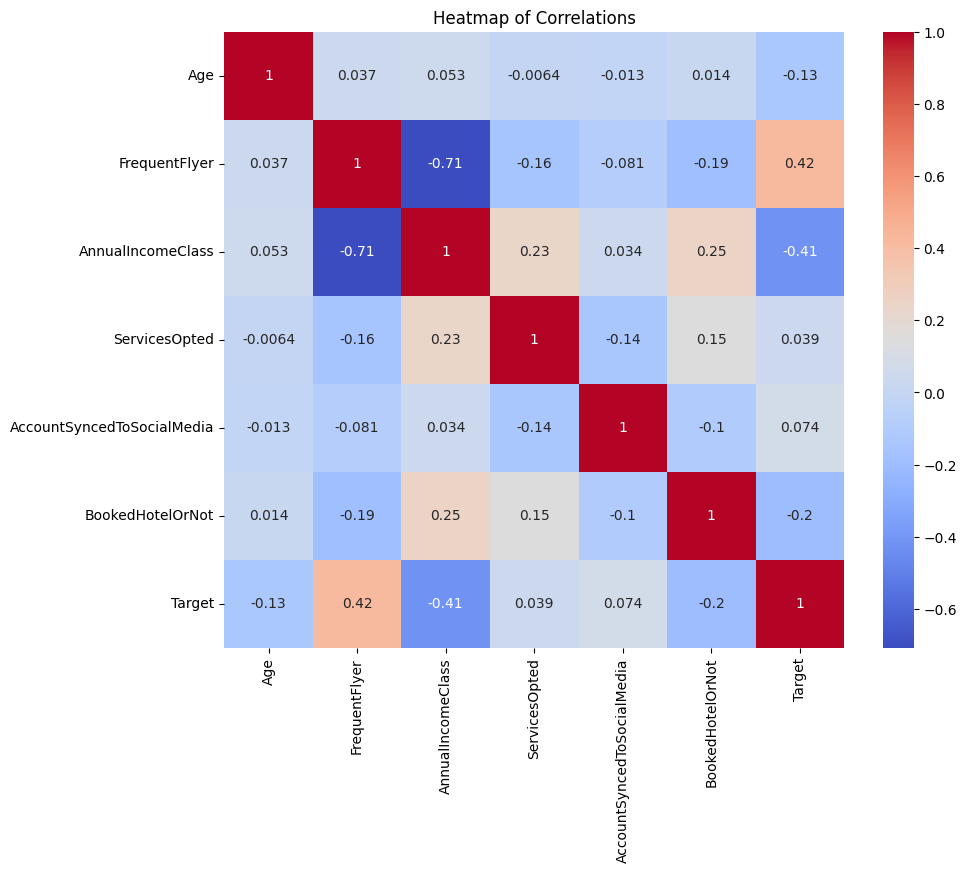

In [ ]:
# Question 15: Plot heatmap of correlations

plt.figure(figsize=(10, 8))
numeric_data = df_travel.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

Now, let's separate the dataset into features (X) and labels (y). Then, split the data into train and test sets using `train_test_split` function from Sklearn with `test_size=0.2`, `random_state=42`, and set `stratify=y` to preserve the label distribution in both sets.

In [ ]:
# Seperate the dataset into features and labels
x = df_travel.drop('Target', axis=1)
y = df_travel['Target']
print(x)
print(y)

     Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0     36              0                  2              6   
1     34              2                  1              5   
2     37              0                  2              3   
3     30              0                  2              2   
4     30              0                  1              1   
..   ...            ...                ...            ...   
955   26              0                  2              1   
956   32              0                  1              1   
957   33              0                  2              1   
958   38              0                  1              1   
959   25              0                  1              1   

     AccountSyncedToSocialMedia  BookedHotelOrNot  
0                             0                 1  
1                             1                 0  
2                             1                 0  
3                             0                 0  
4      

In [ ]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
695   30              0                  2              2   
228   37              0                  2              1   
371   29              0                  2              2   
394   30              0                  1              1   
479   37              0                  2              2   
..   ...            ...                ...            ...   
69    34              2                  0              4   
103   28              0                  1              2   
52    34              0                  1              1   
354   27              0                  2              1   
688   36              0                  1              1   

     AccountSyncedToSocialMedia  BookedHotelOrNot  
695                           0                 1  
228                           0                 1  
371                           0                 0  
394                           0                 0  
479    

Before building any model, it's useful to establish a simple reference point. Imagine predicting the most frequent class for every single observation—no learning, just repetition. The accuracy you'd get from that naive approach is called the baseline accuracy. It’s the minimum benchmark any meaningful model should aim to outperform.

In [ ]:
# Question 16: Calculate baseline accuracy
from collections import Counter
most_frequent_class = Counter(y_train).most_common(1)[0][0]
baseline_accuracy = (y_test == most_frequent_class).mean()

print(f"Baseline accuracy: {baseline_accuracy:.4f}")

Baseline accuracy: 0.7656


Now, let's standardize the features using `StandardScaler` from Sklearn.

In [ ]:
# Standardise features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled)
print(x_test_scaled)

[[-0.60766853 -0.73173507  1.04361424 -0.25110486 -0.77459667  1.2662503 ]
 [ 1.44823206 -0.73173507  1.04361424 -0.87927596 -0.77459667  1.2662503 ]
 [-0.90136862 -0.73173507  1.04361424 -0.25110486 -0.77459667 -0.78973328]
 ...
 [ 0.5671318  -0.73173507 -0.3335262  -0.87927596  1.29099445 -0.78973328]
 [-1.48876879 -0.73173507  1.04361424 -0.87927596 -0.77459667  1.2662503 ]
 [ 1.15453197 -0.73173507 -0.3335262  -0.87927596 -0.77459667  1.2662503 ]]
[[-0.60766853 -0.73173507  1.04361424  1.00523735  1.29099445  1.2662503 ]
 [-0.31396845  1.46776605 -1.71066664 -0.87927596 -0.77459667 -0.78973328]
 [ 0.86083189 -0.73173507  1.04361424  0.37706625 -0.77459667  1.2662503 ]
 ...
 [ 1.15453197 -0.73173507 -0.3335262  -0.87927596  1.29099445 -0.78973328]
 [-0.60766853 -0.73173507  1.04361424  0.37706625  1.29099445 -0.78973328]
 [-0.60766853 -0.73173507  1.04361424  2.26157957 -0.77459667  1.2662503 ]]


## Exercise 2: Logistic regression

First, try use logistic regression for use our data. Use LogisticRegression with the following setting:
`penalty='l2', solver='lbfgs', max_iter=1000, random_state=30`

In [ ]:
# Logistic Regression

model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=30)
model.fit(x_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=30)

In [ ]:
# Question 17: Find the test accuracy
from sklearn.metrics import accuracy_score
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=30)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.8542


Next, train a logistic regression classifier with cross-validation. Use 5 folds and 9 values in the logscale between $10^{-4}$ and $10^4$ for the regularizer parameter. For the rest of the arguments, we use the same values as we used for the logistic regression with no cross validation.

__Important:__ Set the following values for the arguments:
`
penalty='l2', solver='lbfgs', max_iter=1000, random_state=42, cv=4, Cs=*9*
`

In [ ]:
# Train a logistic regression classifier with cross-validation

model_cv = LogisticRegressionCV(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42, cv=5, Cs=9)
model_cv.fit(x_train_scaled, y_train)

LogisticRegressionCV(Cs=9, cv=5, max_iter=1000, random_state=42)

In [ ]:
# Question 18: Find the value of the regularization parameter and the test accuracy

print(f"Best regularization parameter: {model_cv.C_[0]}")
print(f"Test accuracy: {model_cv.score(x_test_scaled, y_test)}")

Best regularization parameter: 1.0
Test accuracy: 0.8541666666666666


## Exercise 3: KNN classifier

Use the KNeighborClassifier from sklearn using the following setting:
`n_neighbors=7, p=2, weights='uniform', algorithm="kd_tree"`

In [ ]:
# KNeighborClassifier

model = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform', algorithm="kd_tree")
model.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7)

Use `GridSearchCV` to find the best hyper-parameters for your KNN model. Use values between 1 and 10 for `n_neighbors` argument and use either 'uniform' or 'distance' for the `weights` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"n_neighbors": range(1, 11), "weights":["uniform", "distance"]}, cv=5
```

In [ ]:
# Question 19: Find the accuracy of the best KNN model

param_grid = {"n_neighbors": range(1, 11), "weights": ["uniform", "distance"]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best accuracy: {accuracy}")

Best accuracy: 0.8697916666666666


In [ ]:
# Question 20: Find the 'n_neighbors' and 'weights' values for the best KNN model

print(f"Best n_neighbors: {grid_search.best_params_['n_neighbors']}")
print(f"Best weights: {grid_search.best_params_['weights']}")

Best n_neighbors: 3
Best weights: distance


## Exercise 4: Decision Tree

Train a Decision Tree classifier on the training data. Use the following values for the arguments of the decision tree:
```
criterion="gini", max_depth=3, random_state=30
```

In [ ]:
# Decision Tree
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=30)
model.fit(x_train_scaled, y_train)


DecisionTreeClassifier(max_depth=3, random_state=30)

Use `GridSearchCV` to find the best hyper-parameters for your decision tree model. Use values between 1 and 7 for `max_depth` argument and use either 'gini' or 'entropy' for the `criterion` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"max_depth": range(1, 8), "criterion":["gini", "entropy"]}, cv=5
```

In [ ]:
# Question 21: Find the accuracy of the best decision tree model

param_grid = {"max_depth": range(1, 8), "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_
print(f"Best accuracy: {best_model.score(x_test_scaled, y_test)}")

Best accuracy: 0.8958333333333334


In [ ]:
# Question 22: Find the 'criterion' and 'max_depth' values for the best decision tree model

print(f"Best criterion: {grid_search.best_params_['criterion']}")
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")

Best criterion: gini
Best max_depth: 6


The company places a strong emphasis on keeping its customers and has solid resources dedicated to retention. In such a case, choosing the right evaluation metric becomes crucial. The answer lies in understanding what matters most in this context.


Question 23: Find the best metric for the company

> TODO: Decision tree

In [ ]:
# Question 24: Find the model that gives the best result using the metric above

df_travel = pd.read_csv("https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/refs/heads/master/data/travel.csv")

for col in df_travel.select_dtypes(include=['object']).columns:
    df_travel[col] = pd.Categorical(df_travel[col]).codes


x = df_travel.drop('Target', axis=1)
y = df_travel['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

models = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=30),
    "Logistic Regression CV": LogisticRegressionCV(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42, cv=5, Cs=9),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', p=2, algorithm="kd_tree"),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=30)
}


results = {}
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    recall = recall_score(y_test, y_pred)
    results[model_name] = recall


best_model = max(results, key=results.get)


print("Recall Scores:")
for model_name, recall in results.items():
    print(f"{model_name}: {recall:.4f}")

print(f"\n\nThe best model based on recall is: {best_model} with a recall score of {results[best_model]:.4f}")

Recall Scores:
Logistic Regression: 0.4889
Logistic Regression CV: 0.4889
KNN: 0.5556
Decision Tree: 0.5778


The best model based on recall is: Decision Tree with a recall score of 0.5778
